<a href="https://colab.research.google.com/github/lukeeees/ADMN5015/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis 
Author: Luke Nigel Laylo


---


Description: This is a sentiment analysis program that parses the tweets fetched from twitter using python

In [1]:
#import libraries
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Fetching Tweets
Objectives:


1.   Connect to twitter API
2.   Get Tweet from @BBCWorld
3.   Save json file



In [ ]:
#!pip install PyYAML --quiet

In [ ]:
import requests
import pandas as pd
import json
import ast
import yaml
import pprint

def create_twitter_url():
    handle = "BBCWorld"
    max_results = 100
    mrf = "max_results={}".format(max_results)
    q = "query=from:{}".format(handle)
    url = "https://api.twitter.com/2/tweets/search/recent?{}&{}".format(
        mrf, q
    )
    return url


def process_yaml():
    with open("/content/config.yaml") as file:
        return yaml.safe_load(file)


def create_bearer_token(data):
    return data["search_tweets_api"]["bearer_token"]

def twitter_auth_and_connect(bearer_token, url):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    response = requests.request("GET", url, headers=headers)
    return response.json()

In [ ]:

def main():
    url = create_twitter_url()
    data = process_yaml()
    bearer_token = create_bearer_token(data)
    res_json = twitter_auth_and_connect(bearer_token, url)
    pprint.pprint(res_json)

    #save the JSON response to a file
    with open("/content/twitter_response.json", "w") as file:
      json.dump(res_json, file,indent=4)    


if __name__ == "__main__":
    main()

{'data': [{'edit_history_tweet_ids': ['1620577935227772928'],
           'id': '1620577935227772928',
           'text': 'Ukraine war: Russian threat growing, front line troops '
                   'fear https://t.co/sczyIKUIDL'},
          {'edit_history_tweet_ids': ['1620558256606253056'],
           'id': '1620558256606253056',
           'text': 'Terrifying moment boulder crashes into home in Hawaii\xa0'
                   'https://t.co/1K3AwnNoQg https://t.co/FyO54fycMS'},
          {'edit_history_tweet_ids': ['1620551021570281472'],
           'id': '1620551021570281472',
           'text': 'Man caught on camera stealing life-sized Gorilla statue '
                   'https://t.co/j8XgJU1cVd'},
          {'edit_history_tweet_ids': ['1620543708876660737'],
           'id': '1620543708876660737',
           'text': 'Flood-hit Auckland region suffers more heavy rain '
                   'https://t.co/agKJwk7Aui'},
          {'edit_history_tweet_ids': ['1620538423604924418'],
       

# Setting up the Data

Objective: To transform the tweets into a Dataframe

In [ ]:
# convert json file to array
id = []
text=[]
with open("/content/twitter_response.json") as file:
    data = json.load(file)
    for item in data['data']:
      id.append(item['id'])
      text.append(item['text'])

   

In [ ]:
# create a dataframe
df = pd.DataFrame(data={"id":id, "text":text})
df

,id,text
0,1620577935227772928,"Ukraine war: Russian threat growing, front lin..."
1,1620558256606253056,Terrifying moment boulder crashes into home in...
2,1620551021570281472,Man caught on camera stealing life-sized Goril...
3,1620543708876660737,Flood-hit Auckland region suffers more heavy r...
4,1620538423604924418,Donald Trump repeatedly invokes Fifth Amendmen...
...,...,...
95,1620059349727985664,Eight killed after shooting at birthday party ...
96,1620051495272996864,Brazilian police hunt dangerous prisoners afte...
97,1620044373348990980,Avalanche kills two skiers in Japan's Nagano r...
98,1620009647858917377,RT @BBCBreaking: At least 28 people killed and...


In [ ]:
#install google cloud
#!pip install --upgrade google-cloud-language --quiet

In [ ]:
import os

# Create environment variable for Google Cloud credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/admn-5015-3282eb056f4f.json'


In [ ]:
# Imports the Google Cloud client library
from google.cloud import language_v1

# Instantiates a client
client = language_v1.LanguageServiceClient()

# loop through the dataframe
tweet=[]
score=[]
mag=[]
for i in range(len(df)):

  # The text to analyze
  text = df.at[i,'text']
  document = language_v1.Document(
  content=text, type_=language_v1.Document.Type.PLAIN_TEXT
  )

  # Detects the sentiment of the text
  sentiment = client.analyze_sentiment(
  request={"document": document}
  ).document_sentiment

  tweet.append(text)
  score.append(sentiment.score)
  mag.append(sentiment.magnitude)
  
df['score'] = score
df['mag'] = mag
df['text'] = tweet

In [ ]:
df

,id,text,score,mag
0,1620577935227772928,"Ukraine war: Russian threat growing, front lin...",-0.4,0.4
1,1620558256606253056,Terrifying moment boulder crashes into home in...,-0.1,0.1
2,1620551021570281472,Man caught on camera stealing life-sized Goril...,-0.4,0.4
3,1620543708876660737,Flood-hit Auckland region suffers more heavy r...,-0.4,0.4
4,1620538423604924418,Donald Trump repeatedly invokes Fifth Amendmen...,-0.4,0.4
...,...,...,...,...
95,1620059349727985664,Eight killed after shooting at birthday party ...,-0.3,0.3
96,1620051495272996864,Brazilian police hunt dangerous prisoners afte...,-0.6,0.6
97,1620044373348990980,Avalanche kills two skiers in Japan's Nagano r...,-0.1,0.1
98,1620009647858917377,RT @BBCBreaking: At least 28 people killed and...,-0.4,0.4


In [1]:
# write to csv df
df.to_csv('/content/sentiment.csv')

NameError: ignored

# Data Exploration

In [2]:
df = pd.read_csv('/content/sentiment.csv')
df

,Unnamed: 0,id,text,score,mag
0,0,1620577935227772928,"Ukraine war: Russian threat growing, front lin...",-0.4,0.4
1,1,1620558256606253056,Terrifying moment boulder crashes into home in...,-0.1,0.1
2,2,1620551021570281472,Man caught on camera stealing life-sized Goril...,-0.4,0.4
3,3,1620543708876660737,Flood-hit Auckland region suffers more heavy r...,-0.4,0.4
4,4,1620538423604924418,Donald Trump repeatedly invokes Fifth Amendmen...,-0.4,0.4
...,...,...,...,...,...
95,95,1620059349727985664,Eight killed after shooting at birthday party ...,-0.3,0.3
96,96,1620051495272996864,Brazilian police hunt dangerous prisoners afte...,-0.6,0.6
97,97,1620044373348990980,Avalanche kills two skiers in Japan's Nagano r...,-0.1,0.1
98,98,1620009647858917377,RT @BBCBreaking: At least 28 people killed and...,-0.4,0.4


In [3]:
# create a new column for the sentiment
df['sentiment'] = np.where(df['score'] >= 0.25, 'positive', 'neutral')
df['sentiment'] = np.where(df['score'] <= -.25, 'negative', df['sentiment'])
df

,Unnamed: 0,id,text,score,mag,sentiment
0,0,1620577935227772928,"Ukraine war: Russian threat growing, front lin...",-0.4,0.4,negative
1,1,1620558256606253056,Terrifying moment boulder crashes into home in...,-0.1,0.1,neutral
2,2,1620551021570281472,Man caught on camera stealing life-sized Goril...,-0.4,0.4,negative
3,3,1620543708876660737,Flood-hit Auckland region suffers more heavy r...,-0.4,0.4,negative
4,4,1620538423604924418,Donald Trump repeatedly invokes Fifth Amendmen...,-0.4,0.4,negative
...,...,...,...,...,...,...
95,95,1620059349727985664,Eight killed after shooting at birthday party ...,-0.3,0.3,negative
96,96,1620051495272996864,Brazilian police hunt dangerous prisoners afte...,-0.6,0.6,negative
97,97,1620044373348990980,Avalanche kills two skiers in Japan's Nagano r...,-0.1,0.1,neutral
98,98,1620009647858917377,RT @BBCBreaking: At least 28 people killed and...,-0.4,0.4,negative


In [4]:
# df summary
df.groupby('sentiment').count()

,Unnamed: 0,id,text,score,mag
sentiment,,,,,
negative,39,39,39,39,39
neutral,57,57,57,57,57
positive,4,4,4,4,4


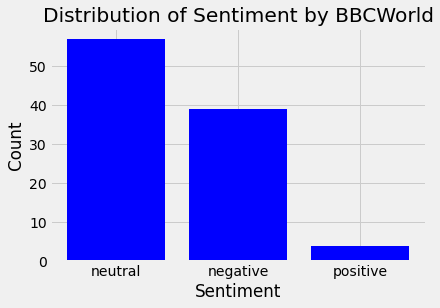

In [5]:
# Count the frequency of each sentiment
sentiment_counts = df["sentiment"].value_counts()

# Plot a bar graph of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values, color="blue")

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiment by BBCWorld")

# Display the plot
plt.show()

## Analysis:
We could see that theres a lot of neutral news, followed by negative news, and only few positive news in BBCWorld.

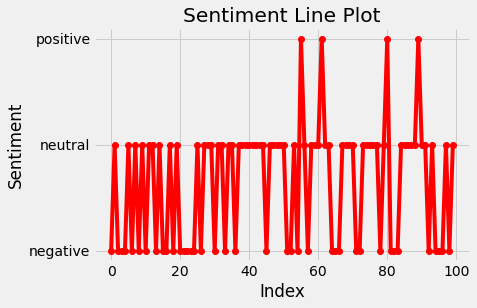

In [6]:
# Create a new DataFrame with the index as the x-axis and the sentiment column as the y-axis
df_line = pd.DataFrame({"sentiment": df["sentiment"]}, index=df.index)

# Plot a line graph of the sentiment values
plt.plot(df_line.index, df_line["sentiment"], color="red", linestyle="-", marker="o")

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Sentiment")
plt.title("Sentiment Line Plot")

# Display the plot
plt.show()

## Analysis
The tweets were arrange from the most recent tweets, it could be seen that recently there has been a lot of neutral to negative news around the world.

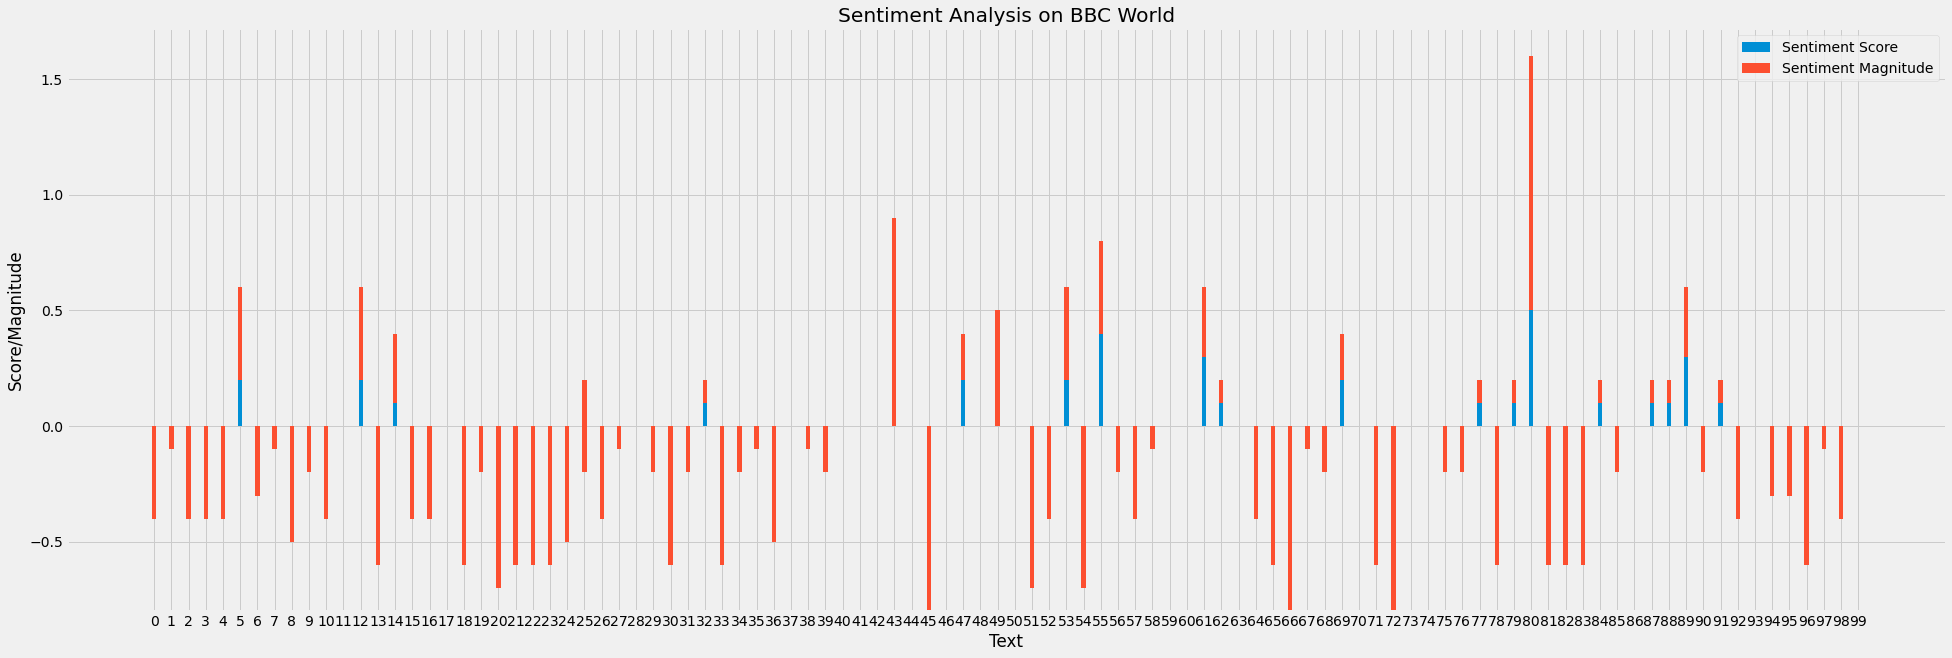

In [8]:
# Create a stacked bar graph of the sentiment score and magnitude
index = range(len(df))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(30,10))
score_bar = ax.bar(index, df["score"], bar_width, label="Sentiment Score")
magnitude_bar = ax.bar(index, df["mag"], bar_width, bottom=df["score"], label="Sentiment Magnitude")

# Add labels and title
ax.set_xlabel("Text")
ax.set_ylabel("Score/Magnitude")
ax.set_title("Sentiment Analysis on BBC World")
ax.set_xticks(index)
ax.legend()

# Display the plot
plt.show()

## Analysis
It could be seen that BBWorld uses strong magnitude to their tweets that showcases strong feelings around the news?

In [ ]:
# compute average score
print(df['score'].mean())
print(df['mag'].mean())

-0.20500000439584254
0.30300000578165054


# Findings

Overall the the tweets from BBCWorld is mostly neutral with a strong magnitude or impact with the words they are using for customer engagement.